In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:
data=pd.read_csv("Train.csv")
X_test=pd.read_csv("Test.csv").values
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [3]:
data=data.values

In [4]:
data.shape

(1600, 6)

In [5]:
x=data[:,:5]
y=data[:,5]

In [6]:
x.shape

(1600, 5)

In [7]:
y.shape

(1600,)

In [8]:
u=x.mean()

In [9]:
std=x.std()
x=(x-u)/std

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
model.coef_

array([29.84297081, 93.16540718,  8.32556432, 45.01071403,  2.53283406])

In [11]:
model.intercept_

1.4913869905090862

In [12]:
pred=model.predict(X_test)

In [13]:
pred=pd.DataFrame(pred,columns=["target"])

In [14]:
pred.head()

,target
0,111.678929
1,115.126666
2,-25.384515
3,-47.702036
4,-99.962149


In [15]:
pred.to_csv("submit.csv",index_label="Id")


In [50]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [65]:
def error(X,Y,theta):
    e=0.0
    e=(np.sum((Y-hypothesis(X,theta))**2))/X.shape[0]
    return e

In [80]:
def gradient(X,Y,theta):
    y_=hypothesis(X,theta)
    
    return (np.dot(X.T,(y_-Y)))/X.shape[0]

In [81]:
def bgd(X,Y,lr=0.1,m_i=300):
    error_list=[]
    theta=np.zeros((X.shape[1],))
    for i in range(m_i):
        error_list.append(error(X,Y,theta))
        grad=gradient(X,Y,theta)
        theta=theta-lr*grad
    return error_list,theta

In [93]:
def gd(X,Y,lr=0.01,m_i=100,bs=20):
    error_list=[]
    theta=np.zeros((X.shape[1],))
    data=np.hstack((X,Y.reshape(-1,1)))
    n_bs=data.shape[0]//bs
    for i in range(m_i):
        np.random.shuffle(data)
        
        for j in range(n_bs):
            x_b=data[j:j+bs,:5]
            y_b=data[j:j+bs,5]
           
            error_list.append(error(x_b,y_b,theta))
            grad=gradient(x_b,y_b,theta)
            theta=theta-lr*grad
        
        
       
    return error_list,theta

In [94]:
error_list,theta=gd(x,y)

In [101]:
# print(error_list)

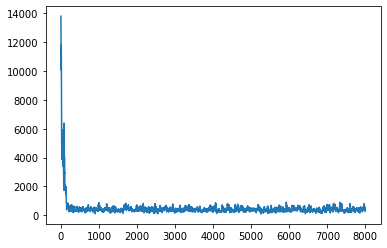

In [96]:
plt.plot(np.arange(len(error_list)),error_list)

In [97]:
print(theta)

[30.07189507 91.55945457  8.70773566 47.09491519  3.39977661]


In [98]:
y_=hypothesis(x,theta)

In [99]:
y_.shape

(1600,)

In [100]:
print(y_)

[ -56.61137826  -92.76545184   53.57465449 ... -118.27640504  -66.90903107
 -114.92034367]


In [90]:
y_=pd.DataFrame(y_,columns=["target"])

In [91]:
y_.head()

,target
0,-52.288334
1,-101.002315
2,57.326506
3,8.743671
4,-64.221628


In [92]:
y_.to_csv("submit_1.csv",index_label="Id")

In [79]:
np.hstack?

Signature: np.hstack(tup)
Docstring:
Stack arrays in sequence horizontally (column wise).

This is equivalent to concatenation along the second axis, except for 1-D
arrays where it concatenates along the first axis. Rebuilds arrays divided
by `hsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of ndarrays
    The arrays must have the same shape along all but the second axis,
    except 1-D arrays which can be any length.

Returns
-------
stacked : ndarray
    The array formed by stacking the given arrays.

See Also
--------
concatenate : Join a sequence of arrays along an existing axis.
stack : Join a sequence of arrays along a new axis.
block : Assemble an nd-array from nested lists of blocks.
vstack : Sta